# Seconds per step
Code that benchmarks how changing the requested number of denoising steps changes performance. In general more steps (up to a point) will lead to better accuracy, but at the cost of runtime. STARLING defaults to 30 steps which offers best possible accuracy while keeping runtime fast.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [2]:
step_sizes = []

times_mps = []
times_cuda = []
times_cpu = []
for s in [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]:
    x=np.loadtxt(f'benchmarking_runs/stepsize_mps/runtime_matrix_{s}_steps_mps_200_batchsize_compile_off.csv',delimiter=',')
    step_sizes.append(s)
    times_mps.append(x[1])

    x=np.loadtxt(f'benchmarking_runs/stepsize_cpu/runtime_matrix_{s}_steps_cpu_200_batchsize_compile_off.csv',delimiter=',')
    times_cpu.append(x[1])

    x=np.loadtxt(f'benchmarking_runs/stepsize_cuda/runtime_matrix_{s}_steps_cuda_200_batchsize_compile_off.csv',delimiter=',')
    times_cuda.append(x[1])    

MPS Seconds/step = 0.0012
CPU Seconds/step = 0.0247
CUDA Seconds/step = 0.0007


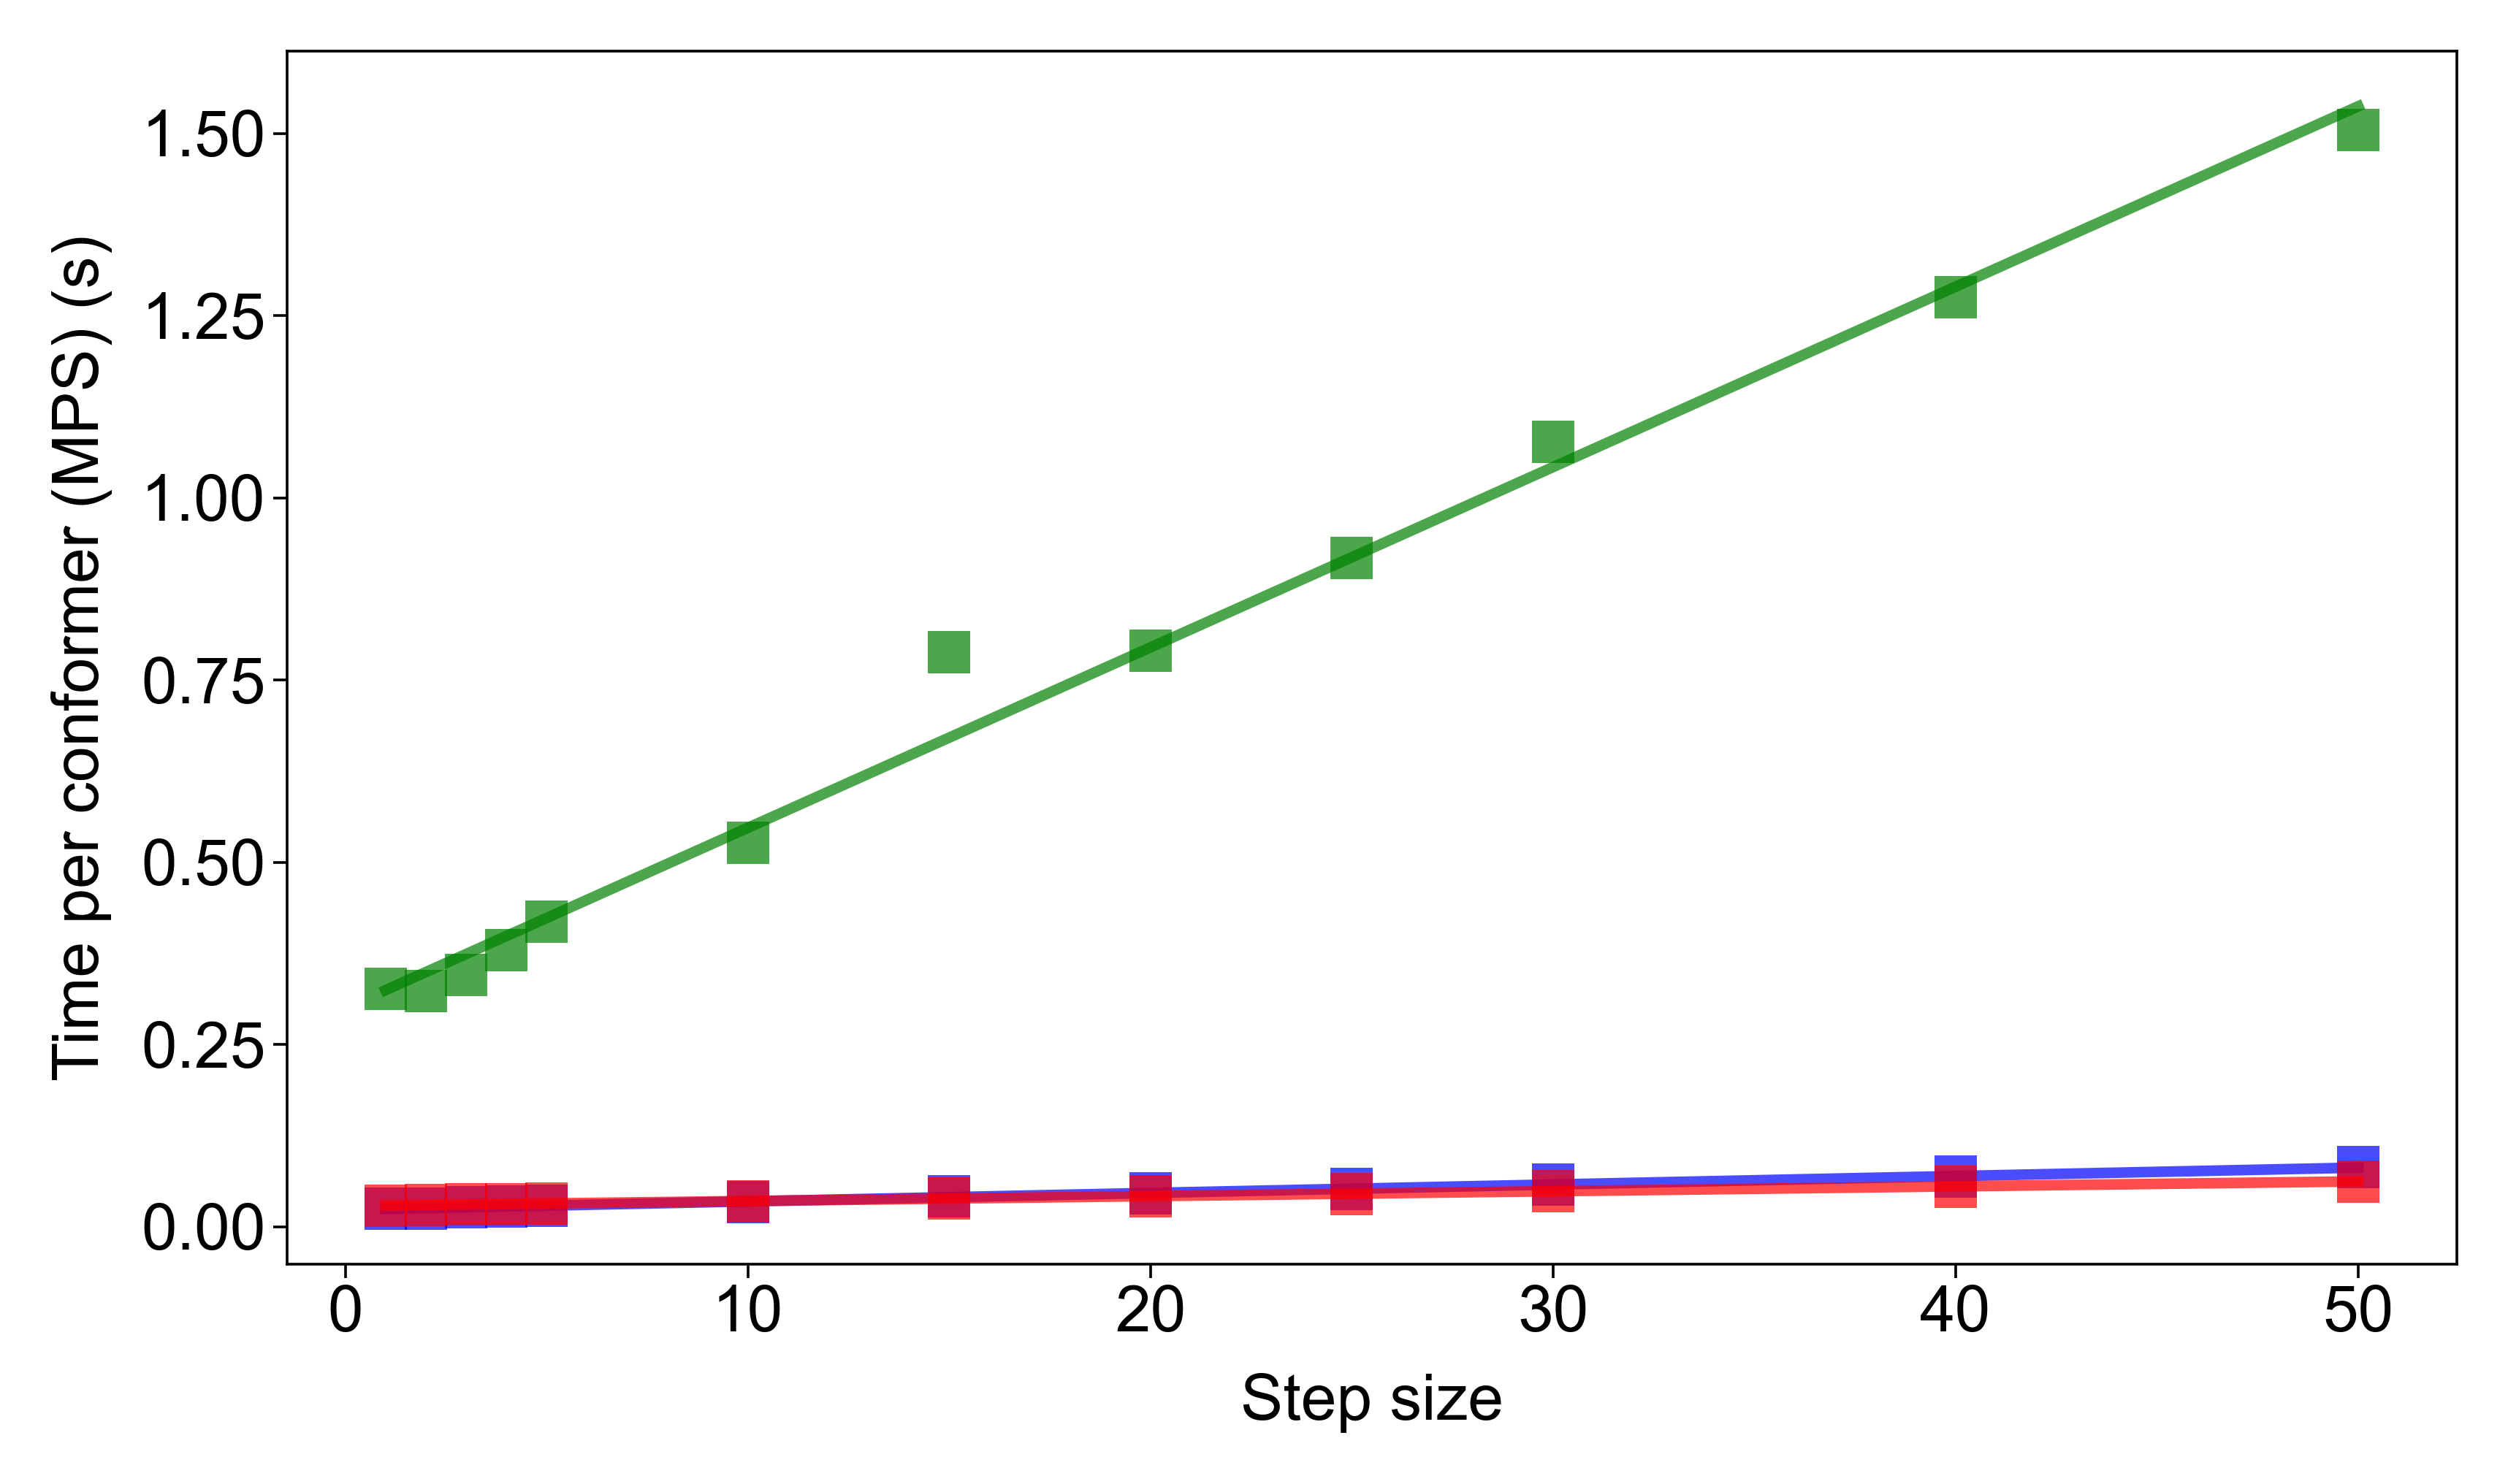

In [4]:
figure(None, (5,3), dpi=350)
ax = plt.gca()

LOGSPACE = False

# mps
plt.plot(step_sizes, np.array(times_mps)/200, 's',color='b', alpha=0.7, mew=0)
f = np.polyfit(step_sizes, np.array(times_mps)/200,1)
xvals = np.arange(1,51)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals, '-',color='b', alpha=0.7, mew=0)
print(f"MPS Seconds/step = {round(f[0],4)}")

# cpu
plt.plot(step_sizes, np.array(times_cpu)/200, 's',color='g', alpha=0.7, mew=0)
f = np.polyfit(step_sizes, np.array(times_cpu)/200,1)
xvals = np.arange(1,51)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals, '-',color='g', alpha=0.7, mew=0)
print(f"CPU Seconds/step = {round(f[0],4)}")

# cuda
plt.plot(step_sizes, np.array(times_cuda)/200, 's',color='r', alpha=0.7, mew=0)
f = np.polyfit(step_sizes, np.array(times_cuda)/200,1)
xvals = np.arange(1,51)
yvals = xvals*f[0]+f[1]
plt.plot(xvals, yvals, '-',color='r', alpha=0.7, mew=0)
print(f"CUDA Seconds/step = {round(f[0],4)}")


#plt.ylim([0,0.1])
plt.ylabel('Time per conformer (MPS) (s)',fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Step size',fontsize=9)
plt.xticks(fontsize=9)

plt.tight_layout()


if LOGSPACE:
    plt.yscale('log')
    plt.savefig('figures/time_per_conf_vs_stepsize_log.pdf')
else:
    plt.savefig('figures/time_per_conf_vs_stepsize.pdf')
